In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import scipy.optimize as spo
from tqdm import tqdm
import urllib.request
import pandas as pd
import os.path as path
import scipy.integrate as integrate
from scipy.stats import chi2
import itertools

# Tecnicas de conteo 



##20.Demostrar la formula de combinaciones con repetición

En las combinaciones con repetición los elementos pueden repetirse dentro de una misma distribución.Esto es analogo a pensar que se van a repartir $r$ objetos identicos entre $n$ grupos. Esto se puede representar de la siguiente forma:

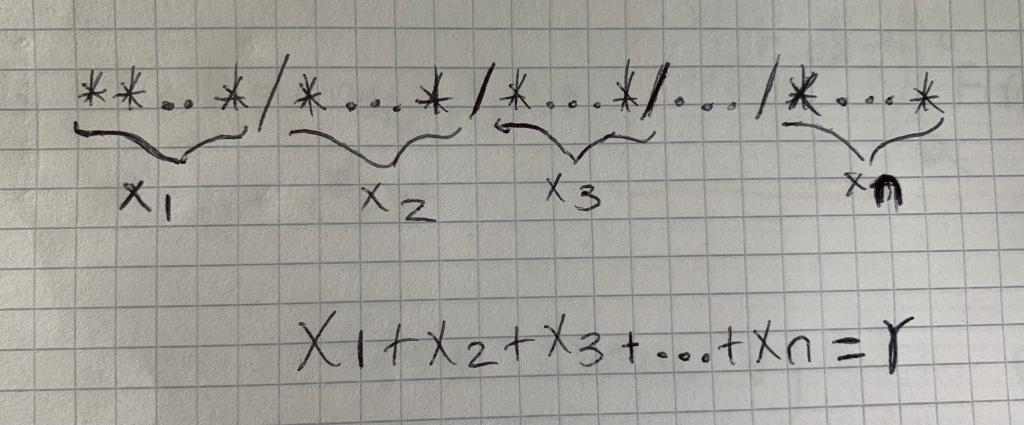




Donde $r$ asteriscos son repartidos en $n$ grupos, divdidos por $n-1$ barras.Esta cadena en total tiene $n+r-1$ elementos en total, contando asteriscos y barras. La combinacion con repeticion es equivalente a las formas en que esta cadena se puede ordenar, por lo que:
$$
CR_r^n={ n+r-1 \choose r}
$$



##22. Cuántas sumas de 3 enteros no negativos dan 10.

Se tiene la ecuacion 

$$
x_1+x_2+x_3=10
$$

Como se vio en el punto anterior, esto es analogo a repartir 10 unidades,en 3 grupos, lo que se calcula mediante la combinacion con repeticion de r=10 y n=3

$$
CR_{10}^3={ 3+10-1 \choose 10}={12 \choose 10}=\frac{12!}{10!(12-10)!}=\frac{12!}{10!2!}=\frac{12*11}{2}=\frac{132}{2}=66
$$

In [ ]:
Conteo=0
for i in range(0,11):
  for j in range(0,11):
    for k in range(0,11):

      if i+j+k==10:
        Conteo+=1

print(Conteo)

66


##23.Se tienen 9 llaves: 3 rojas, 3 azules y 3 verdes. Si elegimos 4, ¿de cuantas formas sepueden distribuir los colores?






In [ ]:
keys:list[str]=["red","red","red","blue","blue","blue","green","green","green"]

cs:set=set(itertools.combinations(keys,4))
print(cs)
print(len(cs))

{('red', 'red', 'red', 'green'), ('blue', 'green', 'green', 'green'), ('blue', 'blue', 'blue', 'green'), ('blue', 'blue', 'green', 'green'), ('red', 'blue', 'blue', 'green'), ('red', 'blue', 'blue', 'blue'), ('red', 'green', 'green', 'green'), ('red', 'blue', 'green', 'green'), ('red', 'red', 'blue', 'blue'), ('red', 'red', 'blue', 'green'), ('red', 'red', 'green', 'green'), ('red', 'red', 'red', 'blue')}
12


#Generales de probabilidad

##4. Calcular la probabilidad que n personas (n ≤ 365) tengan fechas diferentes de cumpleaños, i.e, escribir la formula general de cálculo. Grafique la probabilidad P(n ≤ 80) como función de n.

$$
p(n)=\frac{365}{365}*\frac{364}{365}*\frac{363}{365}*...*\frac{365-n}{365}
$$
$$
p(n)=\frac{365!}{(365-n)!}*(\frac{1}{365})^n
$$

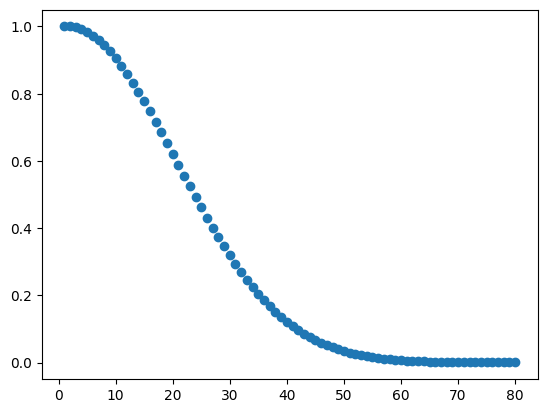

In [ ]:
def Probabilidad(n):
    
    return (np.math.factorial(int(365))/np.math.factorial(int(365)-n))*(int(365)**-n)


N_=np.linspace(1,80,80)
p=np.zeros_like(N_)
for i in range(len(N_)):
    p[i]=Probabilidad(i)
   
    
plt.scatter(N_,p)



##9.imagine que las monedas estan truncadas de tal manera que la probabilidad de que la moneda 1 sea cara es p1 y que sea sello es $1−p1$. Usando el árbol de probabilidad, ¿cuál es la expresión de la probabilidad de obtener dos caras y dos sellos de este evento? Si el truncamiento de las monedas 1 y 2 puede variar como: $0.1 < p1 < 0.9$ y $0.1 < p2 < 0.5$, use el árbol de probabilidad para graficar la superficie de probabilidad del evento A. ¿En qué punto la probabilidad es mínima y máxima, y cuáles son sus valores?


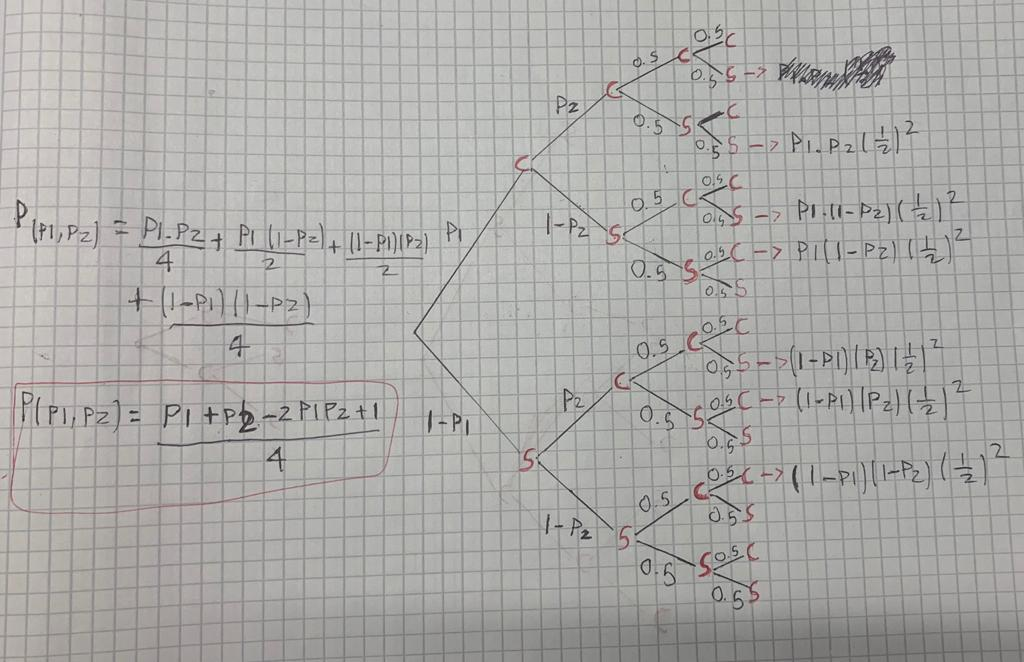

Minimo en:  [0.1 0.1] Con valor:  0.2975000001561251
Maximo en:  [0.9 0.5] Con valor:  -0.4875


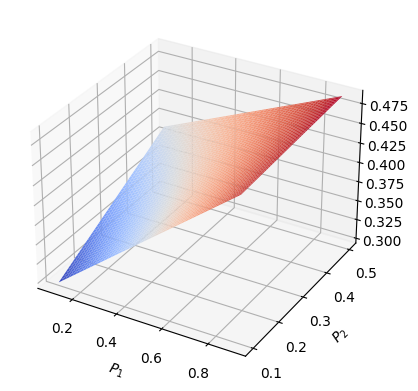

In [ ]:
def Prob(p):
  return 0.25*(p[0]+p[1]-p[0]*p[1]+1)
def Probminus(p):
  return -0.25*(p[0]+p[1]-p[0]*p[1]+1)
p1=np.linspace(0.1,0.9,100)
p2=np.linspace(0.1,0.5,100)

P1,P2=np.meshgrid(p1,p2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(P1,P2,Prob([P1,P2]),cmap="coolwarm")

ax.set_xlabel("$P_1$")
ax.set_ylabel("$P_2$")

p0 = [0.5,0.5]
bounds = ( (0.1,0.9),(0.1,0.5) )


Min = spo.minimize( Prob, p0, options={'disp':False},bounds=bounds )
Max= spo.minimize( Probminus, p0, options={'disp':False},bounds=bounds )
print("Minimo en: ",Min.x,"Con valor: ",Min.fun)
print("Maximo en: ",Max.x,"Con valor: ",Max.fun)

###12.

####a)

Usar combinacion de $n_0$ entre $N$
$$
\Omega(N,n_o)={N \choose n_0}=\frac{N!}{n_0!(N-n0)!}
$$

$N=n_0+n_1$ , entonces $N-n_0=n_1$, y 
$$
\Omega(N,n_o)=\frac{N!}{n_0!n_1!}
$$

####b)

$$
S(N,n_0,n_1)=k_Bln(\Omega(N,n_o,n_1))=k_Bln(\frac{N!}{n_0!n_1!})=k_B[ln(N!)-ln(n_0!)-ln(n_1!)]\approx k_B[Nln(N)-N-n_0ln(n_0)+n_0-n_1ln(n_1)+n_1]
$$

Como $n_0+n_1-N=0$ :

$$
k_B[Nln(N)-N-n_0ln(n_0)+n_0-n_1ln(n_1)+n_1]=k_B[Nln(N)-n_0ln(n_0)-n_1ln(n_1)]=k_B[Nln(N)-\sum_{i=0}^1n_iln(n_i)]
$$

####c)

$$
S=k_B[Nln(N)-n_0ln(n_0)-n_1ln(n_1)]
$$

definir $x=n_1/N$, entonces $n_1=Nx$ y $n_0=N-Nx$

$$
S=k_B[Nln(N)-n_0ln(n_0)-n_1ln(n_1)]=K_b[Nln(N)-(N-Nx)ln(N-Nx)-Nxln(Nx)]=k_BN[ln(N)-ln(N-Nx)+xln(N-Nx)-xln(x)-xln(N)==k_BN[ln(N)-ln(N)-ln(1-x)+xln(N)+xln(1-x)-xln(x)-xln(N]=k_BN[-ln(1-x)+xln(1-x)-xln(x)=k_BN[-xln(x)+ln(1-x)(x-1)]=-k_BN[xln(x)+ln(1-x)(1-x)]
$$


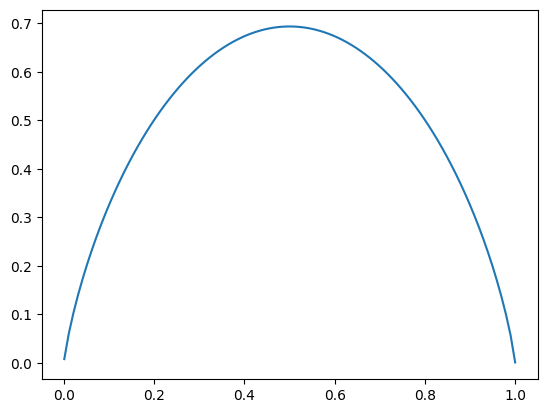

In [ ]:
##D

def S(x):

  return -(x*np.log(x)+(1-x)*np.log(1-x))


x=np.linspace(0.001,0.9999,100)

Entropy=S(x)

plt.plot(x,Entropy)



####E.
$$
\frac{1}{T}=(\frac{∂S}{\partial E})_N=(\frac{∂S}{\partial x})_N(\frac{∂x}{\partial E})_N=-Nk_B(ln(x)-ln(1-x))(\frac{1}{N(\epsilon _1-\epsilon _0)})
$$

$$
\frac{N(\epsilon _1-\epsilon _0)}{T}=-Nk_B(ln(x)-ln(1-x))
$$

$$
\frac{N(\epsilon _1-\epsilon _0)}{TNk_B}=-ln(x)+ln(1-x)
$$


$$
e^{\frac{(\epsilon _1-\epsilon _0)}{Tk_B}}=\frac{1-x}{x}=\frac{1}{x} -1
$$
$$
e^{\frac{(\epsilon _1-\epsilon _0)}{Tk_B}} +1=\frac{1}{x}
$$
$$
x=\frac{1}{1+e^{\frac{(\Delta E)}{Tk_B}}}
$$

####F.

$$
\lim_{T \to \infty} x(T)=\lim_{T \to \infty} \frac{1}{1+e^{-{\Delta E}/{k_bT}}}=\frac{1}{1+e^{-0}}=1/2
$$

$$
\lim_{T \to 0^{+}} x(T)=\lim_{T \to 0^{+}}\frac{1}{1+e^{-{\Delta E}/{k_bT}}}=\frac{1}{1+e^{-\infty}}=1
$$

$$
\lim_{T \to 0^{-}} x(T)=\lim_{T \to 0^{-}}\frac{1}{1+e^{-{\Delta E}/{k_bT}}}=\frac{1}{1+e^{\infty}}=0
$$

$$
\lim_{T \to 0} x(T)=\lim_{T \to 0}\frac{1}{1+e^{-{\Delta E}/{k_bT}}}=no\ existe
$$



$$
\lim_{T \to \infty} S(T)=\lim_{T \to \infty} -K_bN[(1-x(T)ln(1-x(T)+x(T)ln(x(T))]=-k_BN[\lim_{T \to \infty}(1-x(T)ln(1-x(T)+x(T)ln(x(T))]=-k_BN[(1-1/2)ln(1-1/2)+1/2ln(1/2)]=-k_BN[1/2ln(1/2)+1/2ln(1/2)]=-k_BN[ln(1/2)]=k_BNln(2)
$$

####G.

-Tomar un camino isotermico, ya que la entropia es funcion de estado:
$$
S=\int_{V_1}^{V_2}\frac{\delta Q}{T}=1/T\int_{V_1}^{V_2}\frac{nRT}{V}dv=\frac{nRTln(V_2/V_1)}{T}=nRln(2V_1/V_1)=nRln(2)=k_Bln(2)
$$

#Distribuciones de probabilidad:


##3.Un embarque de 10 microchips similares que se envía a distribución tiene 3 aparatos defectuosos. Si una empresa realiza un compra aleatoria de 2 de estos microchips.

####a)
El Numero total de formas de escoger 2 chips entre diez es: $$Total={10 \choose 2} $$


El numero de  formas de escoger x chips defectuosos esta dado por:

$$formas_{defectuosos}(x)={3 \choose x}$$

Similarmente para chips funcionales:
$$formas_{funcionales}(x)={7 \choose 2-x}$$

Por lo que el numero de formas de escoger x chips defectuosos y 2-x chips funcionales es:

$$formas={7 \choose 2-x}{3 \choose x}$$

Por lo que la probabilidad de escoger x chips defectuosos es

$$f(x)=\frac{formas}{Total}\=\frac{{7 \choose 2-x}{3 \choose x}}\{10 \choose 2}\$$





In [ ]:
def f(x):
  return (np.math.comb(7,2-x)*np.math.comb(3,x))/np.math.comb(10,2)



print(f(0),7/15)
print(f(1),7/15)
print(f(2),1/15)


0.4666666666666667 0.4666666666666667
0.4666666666666667 0.4666666666666667
0.06666666666666667 0.06666666666666667


####b)

In [ ]:
Expected_value=0

for i in range(3):
  Expected_value+=i*f(i)

print(Expected_value)

0.6


##4.Una caja cuántica tiene 3 electrones, 2 protones y 3 neutrones. Se selecciona una muestra aleatoria de 4 partículas. Si x es el número de electrones e y es el número de protones.

####a)
El Numero total de formas de escoger 4 particulas entre diez es: $$Total={8 \choose 4} $$


El numero de  formas de escoger $x$ electrones esta dado por:

$$formas_{electrones}(x)={3 \choose x}$$

Similarmente para protones:
$$formas_{protones}(x)={2 \choose y}$$

para neutrones:
$$formas_{neutrones}(x)={3 \choose 4-x-y}$$

Por lo que el numero de formas de escoger $x$ electrones, $y$ protones y $4-x-y$ neutrones es:

$$formas={3 \choose x}{2 \choose y}{3 \choose 4-x-y}$$

Por lo que la probabilidad de escoger $x$ electrones, y $y$ protones es:

$$f(x)=\frac{formas}{Total}\=\frac{{3 \choose x}{2 \choose y}{3 \choose 4-x-y}}\{8 \choose 4}\$$



In [ ]:
def f2(x,y):
  return (np.math.comb(3,x)*np.math.comb(2,y)*np.math.comb(3,4-x-y))/np.math.comb(8,4)




P=np.zeros((4,3))
x=np.array([0,1,2,3])
y=np.array([0,1,2])
for i in x:
  for j in y:

    if i+j<=4:
      P[i,j]=f2(i,j)
      


###b

g_x=np.sum(P,axis=1)

h_y=np.sum(P,axis=0)

print(g_x,h_y)

[0.07142857 0.42857143 0.42857143 0.07142857] [0.21428571 0.57142857 0.21428571]


In [ ]:
###c
E_x=np.sum(g_x*x)

print(E_x,105/70)

1.4999999999999998 1.5


In [ ]:
###d
E_y=np.sum(h_y*y)

print(E_y,1)

1.0 1


In [ ]:
###e
E_xy=0
for i in x:
  for j in y:
    E_xy+=i*j*P[i,j]
    

COV1=E_xy-E_x*E_y

print(COV1,-3/14)

-0.2142857142857142 -0.21428571428571427


In [ ]:
###f
COV2=0
for i in x:
  for j in y:
    if i+j<=4:
      COV2+=(i-E_x)*(j-E_y)*P[i,j]
    



print(COV2,-3/14)

-0.2142857142857143 -0.21428571428571427


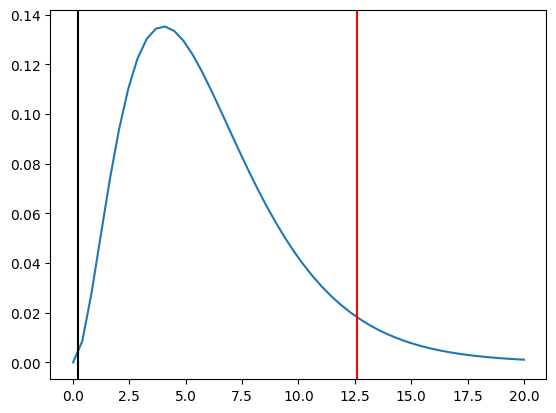

In [ ]:
###g

po=np.zeros_like(P)
for i in range(4):
    for j in range(3):
        po[i,j]=g_x[i]*h_y[j]
        
fo=P
fe=po

def GetChi2(x,y):
    return np.sum((x-y)**2/y)

ObsChi2=GetChi2(fo,fe)
df=6
##Valor critico

CriChi2=chi2.ppf(0.95,df=df)

##Si OBSChi2<CRIChi2 no se puede descartar la hipotesis nula(variables son independientes)

x = np.linspace(0,20,50)
y = chi2.pdf(x,df=df)
plt.plot(x,y)
plt.axvline(x=ObsChi2,color='k')
plt.axvline(x=CriChi2,color='r')

CL=chi2.cdf(ObsChi2,df=df)
pvalue=1-CL


In [ ]:
po,P

(array([[0.01530612, 0.04081633, 0.01530612],
        [0.09183673, 0.24489796, 0.09183673],
        [0.09183673, 0.24489796, 0.09183673],
        [0.01530612, 0.04081633, 0.01530612]]),
 array([[0.        , 0.02857143, 0.04285714],
        [0.04285714, 0.25714286, 0.12857143],
        [0.12857143, 0.25714286, 0.04285714],
        [0.04285714, 0.02857143, 0.        ]]))

In [ ]:
pvalue

0.9997956866976904

Las variables tienen un 99% de probabilidad de ser independientes

##Distribuciones continuas de probabilidad

##3.

####A)

$$
\iint_R f(x,y) \,dx\,dy=\int_{x}\int_{y} \frac{2}{3}(x+2y)\,dy\,dx=\int_{0}^1\int_{0}^1 \frac{2}{3}(x+2y)\,dy\,dx=\frac{2}{3}\int_{0}^1(xy+y^2)]^{y=1}_{y=0}\,dx=\frac{2}{3}\int_{0}^1(x+1)\,dx=\frac{2}{3}(\frac{x^2}{2}+x)]^{x=1}_{x=0}=\frac{2}{3}(\frac{3}{2})=1
$$

####B)

$$
g(x)=\int_y f(x,y)dy=\int_{0}^1\frac{2}{3}(x+2y)\,dy=\frac{2}{3}(xy+y^2)]^{y=1}_{y=0}=\frac{2}{3}(x+1)
$$

$$
h(y)=\int_x f(x,y)dx=\int_{0}^1\frac{2}{3}(x+2y)\,dx=\frac{2}{3}(x^2/2+2xy)]^{x=1}_{x=0}=\frac{2}{3}(1/2+2y)=\frac{4}{3}y+\frac{1}{3}
$$

####C)
$$
E(x)=\int_x x g(x)\,dx=\int_0^1\frac{2}{3}(x+1)x\,dx=\frac{2}{3}(\frac{x^3}{3}+\frac{x^2}{2})]^{x=1}_{x=0}=2/3(1/3+1/2)=5/9
$$

####D)

$$
E(y)=\int_y y h(y)\,dy=\int_0^1(\frac{4}{3}y+\frac{1}{3})y\,dy=(\frac{4y^3}{9}+\frac{y^2}{6})]^{y=1}_{y=0}=(4/9+1/6)=11/18
$$

####E)
$$
E(xy)=\iint_R f(x,y) xy\,dx\,dy=\int_{0}^1\int_{0}^1 \frac{2}{3}(x+2y)xy\,dy\,dx=\int_0^1(\frac{1}{3}x^2+\frac{4}{9})x\,dx=1/3
$$
$$
\sigma_{xy}=E(xy)-E(x)*E(y)=1/3-5/9*11/18\approx -0.006
$$


In [ ]:
def f(x,y):
  
    return 2/3*(x+2*y)
 
x,y=sym.symbols("x,y")
func=f(x,y)
##a
I=sym.integrate(func,(x,0,1),(y,0,1))

I

1.00000000000000

In [ ]:
g=sym.integrate(func,(y,0,1))
g

0.666666666666667*x + 0.666666666666667

In [ ]:
h=sym.integrate(func,(x,0,1))
h

1.33333333333333*y + 0.333333333333333

In [ ]:
E_x=sym.integrate(x*g,(x,0,1))
print(E_x,10/18)

0.555555555555556 0.5555555555555556


In [ ]:
E_y=sym.integrate(y*h,(y,0,1))
print(E_y,11/18)

0.611111111111111 0.6111111111111112


In [ ]:
E_XY=sym.integrate(func*x*y,(x,0,1),(y,0,1))

COV1=E_XY-E_x*E_y

print(COV1,-0.00617)

-0.00617283950617281 -0.00617


In [ ]:
COV2=sym.integrate(func*(x-E_x)*(y-E_y),(x,0,1),(y,0,1))
print(COV2)

-0.00617283950617284


In [ ]:
p_e=g*h

p_e.expand()

0.888888888888889*x*y + 0.222222222222222*x + 0.888888888888889*y + 0.222222222222222

####g) Son las variables x e y independientes?
No, ya que la covarianza es diferente de cero, por otro lado $f(x,y)\neq g(x)h(y)$

##4.

$$
\hat{\mu}_{g(X)}=\int_{-\infty}^{\infty} g(x)f(x)dx=\int_{-\infty}^{0} g(x)f(x)dx + \int_{0}^{\infty} g(x)f(x)dx=\int_{-\infty}^{0} 0 dx+\int_{0}^{\infty} e^{2x/3}e^{-x}dx=\int_{0}^{\infty} e^{2x/3}e^{-x}dx=\int_{0}^{\infty} e^{-x/3}dx=-3\int_0^{\infty}e^u du=-3e^{-x/3}]_0^\infty=0-(-3e^0)=3
$$

In [ ]:
def f(x):

    return sym.exp(-x)

x=sym.Symbol("x")
func=f(x)

def g(x):
  return sym.exp(2*x/3)

G=g(x)

Expected_value=sym.integrate(func*G,(x,0,sym.oo))

Expected_value


3

#Metropolis-Hastings

##1.

100%|██████████| 99999/99999 [00:24<00:00, 4039.82it/s]


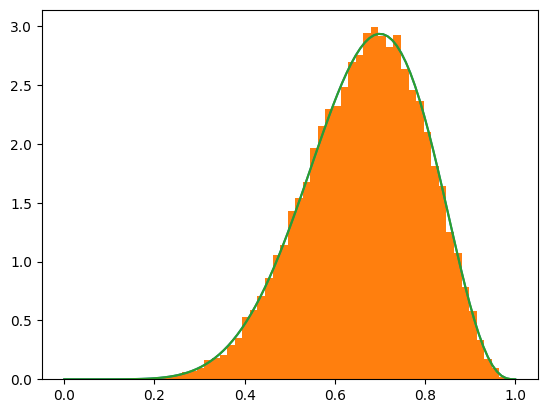

In [ ]:
def Prior(p):
    return np.piecewise(p,[p>=0 and p<=1,p<0 and p>1],[lambda p:1,lambda p:0])

Prior=np.vectorize(Prior)

def Likelihood(p,r,n):
    return  p**r*(1-p)**(n-r)


def Posterior(p,r,n):
    return Likelihood(p,r,n)*Prior(p)



p=np.linspace(0,1,100)
r=7
n =10
Pos=Posterior(p,r,n)


I_=integrate.quad(Posterior,p[0],p[-1],args=(r,n))
Pos=Pos/I_[0]

plt.plot(p,Pos)

def Metropolis(x0, Posterior, NSteps=int(1e5), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    # Prior
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Posterior(x[i-1],r,n)
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Posterior(xf,r,n)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[1000:,:]
initparams = np.array([0.2])
MCMC = Metropolis(initparams,Posterior)

plt.hist(MCMC,density=True,bins=50)
plt.plot(p,Pos)

liminf=np.percentile(MCMC,16)
limsup=np.percentile(MCMC,84)
mediana=np.percentile(MCMC,50)
prob=mediana


In [ ]:
prob

0.6753480985656108

In [ ]:
liminf-mediana,limsup-mediana

(-0.14466099076577432, 0.12437132925957273)

$$
\hat{p}=0.67_{0.14}^{0.12}
$$

In [ ]:
r=5
MCMC_even = Metropolis(initparams,Posterior)
Upper_limit_even=np.percentile(MCMC_even,95)

100%|██████████| 99999/99999 [00:22<00:00, 4391.00it/s]


In [ ]:
print(prob>Upper_limit_even)

False


No se puede descartar el modelo justo con el 95 porciento de confianza, por lo que no se puede afirmar que la moneda esta truncada

##3.

100%|██████████| 9999/9999 [00:00<00:00, 29304.52it/s]


(array([0.00452898, 0.00301932, 0.        , 0.00452898, 0.00150966,
        0.01660627, 0.04076085, 0.04076085, 0.03321254, 0.07699272,
        0.07095407, 0.12983085, 0.17361103, 0.14794679, 0.22946849,
        0.28381629, 0.3260868 , 0.39855053, 0.4619563 , 0.56461325,
        0.59933546, 0.67783783, 0.74879191, 0.79106242, 0.74275326,
        0.80615903, 0.74577258, 0.79106242, 0.81521699, 0.69444411,
        0.64613495, 0.60235478, 0.57669054, 0.5163041 , 0.45289833,
        0.37439595, 0.29287425, 0.26721001, 0.20229459, 0.14039848,
        0.16002408, 0.07699272, 0.07246373, 0.05283814, 0.04076085,
        0.02264492, 0.01207729, 0.01056763, 0.00301932, 0.00150966]),
 array([0.25128416, 0.31819328, 0.38510241, 0.45201153, 0.51892065,
        0.58582978, 0.6527389 , 0.71964803, 0.78655715, 0.85346627,
        0.9203754 , 0.98728452, 1.05419364, 1.12110277, 1.18801189,
        1.25492101, 1.32183014, 1.38873926, 1.45564838, 1.52255751,
        1.58946663, 1.65637575, 1.72328488, 1.

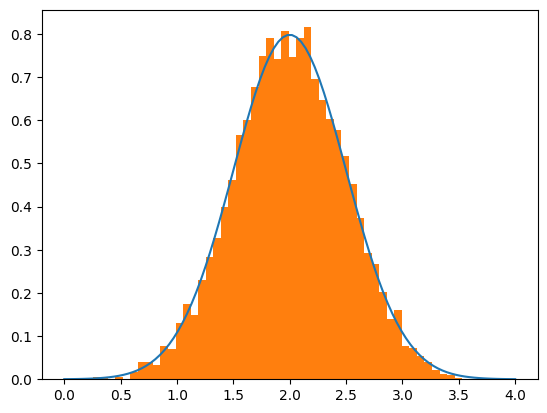

In [ ]:
def Metropolis(x0, Normal, NSteps=int(1e4), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    # Prior
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Normal(x[i-1],mu,sigma)
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Normal(xf,mu,sigma)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[100:,:]

def normal(x,mu,sigma):
  c=1/np.sqrt(2*np.pi*sigma**2)
  return np.exp(-0.5*((x-mu)/sigma)**2)*c


mu=2
sigma=0.5
x_=np.linspace(0,4,100)

plt.plot(x_,normal(x_,2,0.5))
x0=np.array([1.])
MCMC = Metropolis(x0,normal)

plt.hist(MCMC,density=True,bins=50)




##4.

100%|██████████| 999999/999999 [00:22<00:00, 43760.78it/s]


(array([2.50108111e-05, 3.93027032e-05, 5.00216223e-05, 6.61000009e-05,
        1.71502705e-04, 2.64400003e-04, 3.93027032e-04, 5.62743251e-04,
        5.64529737e-04, 5.59170278e-04, 6.05618927e-04, 6.52067576e-04,
        6.14551359e-04, 6.35989197e-04, 6.57427036e-04, 4.94856763e-04,
        3.73375681e-04, 3.98386492e-04, 3.28713518e-04, 5.16294601e-04,
        5.00216223e-04, 4.41262168e-04, 4.26970276e-04, 3.46578383e-04,
        3.69802708e-04, 4.26970276e-04, 4.37689195e-04, 3.69802708e-04,
        5.21654061e-04, 7.43178388e-04, 1.03258920e-03, 1.13263245e-03,
        1.23446218e-03, 1.50064867e-03, 1.30770813e-03, 1.27019191e-03,
        1.19515948e-03, 1.62391624e-03, 1.52923245e-03, 1.46134597e-03,
        1.50958110e-03, 1.70609462e-03, 2.27241084e-03, 2.63328112e-03,
        3.60334329e-03, 3.85881086e-03, 5.12900277e-03, 6.38132981e-03,
        8.70018930e-03, 1.09207920e-02, 1.36469704e-02, 1.72092245e-02,
        2.18469435e-02, 3.15904410e-02, 4.78706925e-02, 7.506280

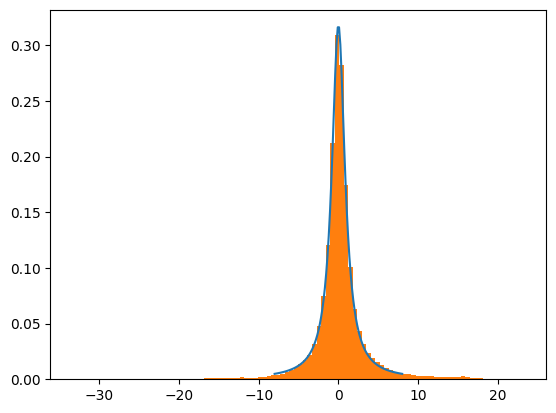

In [ ]:
def Metropolis(x0, Cauchy, NSteps=int(1e5), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    # Prior
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Cauchy(x[i-1])
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Cauchy(xf)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[10000:,:]

def cauchy(x):

  return 1/(np.pi*(1+x**2))


mu=2
sigma=0.5
x_=np.linspace(-8,8,100)

plt.plot(x_,cauchy(x_))

x0=np.array([-0.])
MCMC = Metropolis(x0,cauchy)

plt.hist(MCMC,density=True,bins=100,)


#Estimacion de parametros

##3.

  0%|          | 0/20000 [00:00<?, ?it/s]<ipython-input-53-bac4f4b51005>:48: RuntimeWarning: divide by zero encountered in log
  if (acceptance(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):
<ipython-input-53-bac4f4b51005>:36: RuntimeWarning: invalid value encountered in double_scalars
  return (accept < (np.exp(x_new-x)))
<ipython-input-53-bac4f4b51005>:50: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  accepted[i]=x
<ipython-input-53-bac4f4b51005>:52: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)

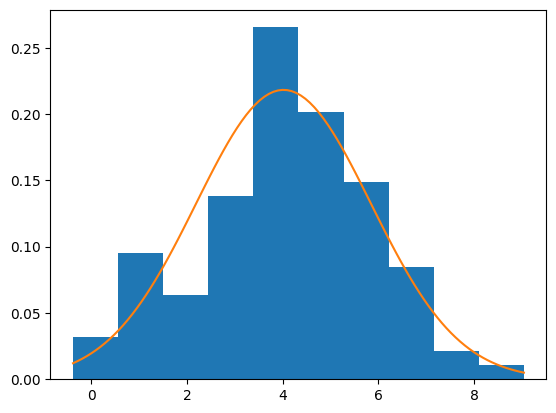

In [ ]:




file = 'Gaussiana.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Gaussiano.csv'

data = pd.read_csv(url,sep=",",engine='python')
X = data.x




transition_model = lambda x: [np.random.normal(x[0],0.5,(1,)),np.random.normal(x[1],0.5,(1,))]

def prior(x):
    
    if(3.<=x[0] <=5.)and(0.5<=x[1] <=3.5):
        return 1
    else:
        return 0


def Likelihood(x,data):

  return (np.exp(-0.5*(x[0]-data)**2/x[1]**2))/(np.sqrt(2*np.pi*x[1]**2))

def LogLikelihood(x,data):
  
    return np.sum(np.log(Likelihood(x,data)))



def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)

        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance):
   
    x = param_init
    accepted =np.zeros((iterations,2))
   
    for i in  tqdm(range(iterations)):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted[i]=x
        else:
            accepted[i]=x    
                
    return accepted[1000:,:]

accepted = metropolis_hastings(LogLikelihood,prior,transition_model,[2,3], 20000,X,acceptance)





Best_params=np.array([np.percentile(accepted[:,0],50),np.percentile(accepted[:,1],50)])

_x = np.linspace(np.min(X),np.max(X),100)

plt.hist(X,density=True)
plt.plot(_x,Likelihood(Best_params,_x))






In [ ]:
Best_params

array([4.01610121, 1.82812485])

In [ ]:
Percentile84=np.array([np.percentile(accepted[:,0],84),np.percentile(accepted[:,1],84)])
Percentile16=np.array([np.percentile(accepted[:,0],16),np.percentile(accepted[:,1],16)])

Mu_error=[Percentile84[0]-Best_params[0],Percentile16[0]-Best_params[0]]
Sigma_error=[Percentile84[1]-Best_params[1],Percentile16[1]-Best_params[1]]

Mu_error,Sigma_error

([0.17797348568243354, -0.18950323532888502],
 [0.13769428658180494, -0.11986622222042409])

$$
\hat{\mu}=4.01_{0.18}^{0.18} at68\%CL
$$

$$
\hat{\sigma}=1.83_{0.11}^{0.13} at68\%CL
$$

##5.

In [ ]:
N=int(1e6)
theta=2
n=20
Points=np.zeros([N,n])


for i in tqdm(range(N)):
    
   Points[i]=(np.random.exponential(theta,n))
        
Promedio=np.mean(Points,axis=1)

Var_estimada=np.var(Promedio,ddof=1)

print("\n")
print(Var_estimada,theta**2/n)

100%|██████████| 1000000/1000000 [00:05<00:00, 179527.24it/s]




0.1996811958321326 0.2
